## Гаврилов Л.Я. ИУ5-23М

## <strong>Вариант 4</strong>

Каждая задача предполагает использование набора данных.

Набор данных выбирается Вами произвольно с учетом следующих условий:

- Вы можете использовать один набор данных для решения всех задач, или решать каждую задачу на своем наборе данных.

- Набор данных должен отличаться от набора данных, который использовался в лекции для решения рассматриваемой задачи.

- Вы можете выбрать произвольный набор данных (например тот, который Вы использовали в лабораторных работах) или создать собственный набор данных (что актуально для некоторых задач, например, для задач удаления псевдоконстантных или повторяющихся признаков).

- Выбранный или созданный Вами набор данных должен удовлетворять условиям поставленной задачи. Например, если решается задача устранения пропусков, то набор данных должен содержать пропуски.


Номер задачи №1 - 4

Номер задачи №2 - 24

# Задача №4.
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "label encoding".

# Задача №24.
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе 5% и 95% квантилей.

# Дополнительные требования:
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

## Загрузка и первичный анализ данных

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:

data = pd.read_csv('bike-hour.csv', sep=",")


In [ ]:
data.head(5)

,instant,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,01-01-2011,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,16
1,2,01-01-2011,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,40
2,3,01-01-2011,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,32
3,4,01-01-2011,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,13
4,5,01-01-2011,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


[Датасет](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

Информация об атрибутах:

* instant: индекс записи

*	dteday: дата

*	season: Сезон (1: зима, 2: весна, 3: лето, 4: осень)

*	mnth: месяц (от 1 до 12)

*	hour: час (от 0 до 23)

*	holiday: выходной или нет

*	weekday: день недели

*	workingday: если день не является ни выходным, ни праздничным - 1, в противном случае - 0.

*	weathersit:

	1: Ясно, Небольшая облачность, Небольшая облачность,

  2: Туман + Облачно, Туман + Разбитые облака, Туман + Несколько облаков, Туман

  3: слабый снег, легкий дождь + гроза + рассеянные облака, легкий дождь + рассеянные облака

  4: сильный дождь + ледяные поддоны + гроза + туман, снег + туман

*	temp: нормализованная температура в градусах Цельсия

*	atemp: нормализованная температура ощущения в градусах Цельсия

*	hum: нормализованная влажность

*	windspeed: нормализованная скорость ветра

*	casul: количество случайных прохожих

*	cnt: общее количество взятых напрокат велосипедов


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     8645 non-null   int64  
 1   dteday      8645 non-null   object 
 2   season      8645 non-null   int64  
 3   mnth        8645 non-null   int64  
 4   hr          8645 non-null   int64  
 5   holiday     8645 non-null   int64  
 6   weekday     8645 non-null   int64  
 7   workingday  8645 non-null   int64  
 8   weathersit  8645 non-null   int64  
 9   temp        8645 non-null   float64
 10  atemp       8645 non-null   float64
 11  hum         8645 non-null   float64
 12  windspeed   8645 non-null   float64
 13  casual      8645 non-null   int64  
 14  cnt         8645 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 1013.2+ KB


In [ ]:
data.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
count,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000
mean,4323.000000,2.513592,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,28.600578,143.794448
std,2495.740872,1.105477,3.428147,6.907822,0.163966,2.006370,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,38.840789,133.797854
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,2162.000000,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,3.000000,31.000000
50%,4323.000000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,109.000000
75%,6484.000000,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,38.000000,211.000000
max,8645.000000,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,272.000000,651.000000


# Задача №4.
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "label encoding".


In [ ]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 8645


In [ ]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>=0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка dteday. Тип данных object. Количество пустых значений 0, 0.0%.


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
cat_enc = pd.DataFrame({'c1':data['dteday']})
cat_enc

,c1
0,01-01-2011
1,01-01-2011
2,01-01-2011
3,01-01-2011
4,01-01-2011
...,...
8640,31-12-2011
8641,31-12-2011
8642,31-12-2011
8643,31-12-2011


In [ ]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [ ]:
cat_enc['c1'].unique()

array(['01-01-2011', '02-01-2011', '03-01-2011', '04-01-2011',
       '05-01-2011', '06-01-2011', '07-01-2011', '08-01-2011',
       '09-01-2011', '10-01-2011', '11-01-2011', '12-01-2011',
       '13-01-2011', '14-01-2011', '15-01-2011', '16-01-2011',
       '17-01-2011', '18-01-2011', '19-01-2011', '20-01-2011',
       '21-01-2011', '22-01-2011', '23-01-2011', '24-01-2011',
       '25-01-2011', '26-01-2011', '27-01-2011', '28-01-2011',
       '29-01-2011', '30-01-2011', '31-01-2011', '01-02-2011',
       '02-02-2011', '03-02-2011', '04-02-2011', '05-02-2011',
       '06-02-2011', '07-02-2011', '08-02-2011', '09-02-2011',
       '10-02-2011', '11-02-2011', '12-02-2011', '13-02-2011',
       '14-02-2011', '15-02-2011', '16-02-2011', '17-02-2011',
       '18-02-2011', '19-02-2011', '20-02-2011', '21-02-2011',
       '22-02-2011', '23-02-2011', '24-02-2011', '25-02-2011',
       '26-02-2011', '27-02-2011', '28-02-2011', '01-03-2011',
       '02-03-2011', '03-03-2011', '04-03-2011', '05-03

In [ ]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Таким образом, наблюдаем, что датасет содержит данные 365 дней в 2011 году, каждое значение из которых было преобразовано из категориального признака в числовой с помощью label encoding.

# Задача №24.
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе 5% и 95% квантилей.

In [ ]:
data = pd.read_csv('games.csv', sep=",")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30250 entries, 0 to 30249
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        30250 non-null  int64  
 1   id                30250 non-null  int64  
 2   Name              30156 non-null  object 
 3   RawgID            30156 non-null  float64
 4   SteamURL          30195 non-null  object 
 5   Metacritic        3356 non-null   float64
 6   Genres            27282 non-null  object 
 7   Indie             30045 non-null  float64
 8   Presence          30156 non-null  float64
 9   Platform          30123 non-null  object 
 10  Graphics          25930 non-null  object 
 11  Storage           27491 non-null  object 
 12  Memory            28316 non-null  object 
 13  RatingsBreakdown  15044 non-null  object 
 14  ReleaseDate       27024 non-null  object 
 15  Soundtrack        30045 non-null  float64
 16  Franchise         5087 non-null   object

In [ ]:
data = data.drop('Publisher', 1)
data = data.drop('Unnamed: 0', 1)
data = data.dropna(axis=0, subset=['Name', 'SteamURL'])
data.shape


<ipython-input-87-aefd0e2a8e93>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Publisher', 1)
<ipython-input-87-aefd0e2a8e93>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Unnamed: 0', 1)


(30101, 25)

In [ ]:
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
# Количество пропусков
[(c, data[c].isnull().sum()) for c in hcols_with_na]

[('Metacritic', 26746),
 ('Genres', 2907),
 ('Indie', 176),
 ('Platform', 33),
 ('Graphics', 4250),
 ('Storage', 2697),
 ('Memory', 1872),
 ('RatingsBreakdown', 15112),
 ('ReleaseDate', 3132),
 ('Soundtrack', 176),
 ('Franchise', 25024),
 ('OriginalCost', 688),
 ('DiscountedCost', 29374),
 ('Players', 17813),
 ('Controller', 219),
 ('Languages', 168),
 ('ESRB', 25355),
 ('Description', 125),
 ('Tags', 176)]

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    QUANTILE = 1

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    return lower_boundary, upper_boundary

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

In [ ]:
x_col_list = ['Metacritic']

<ipython-input-92-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


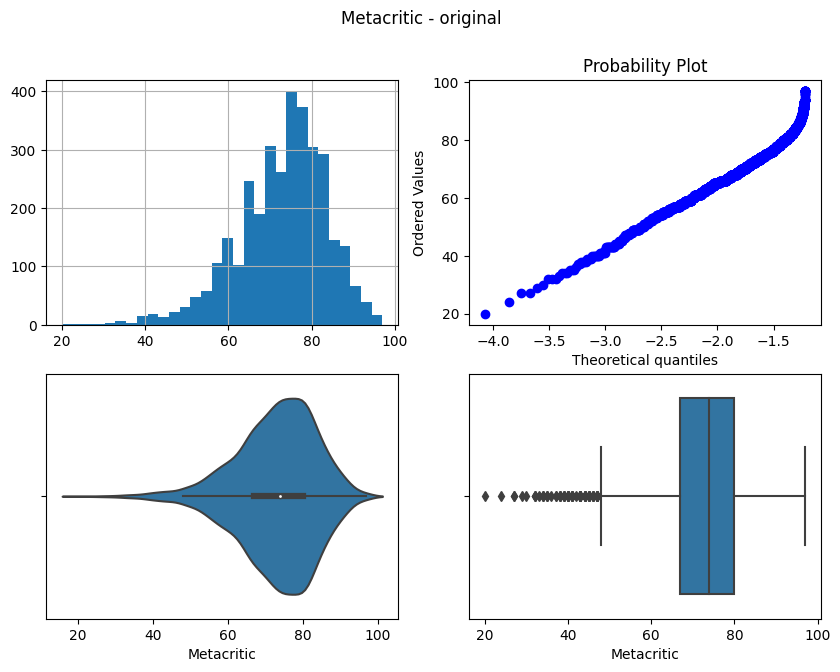

In [ ]:
diagnostic_plots(data, 'Metacritic', 'Metacritic - original')

<ipython-input-92-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


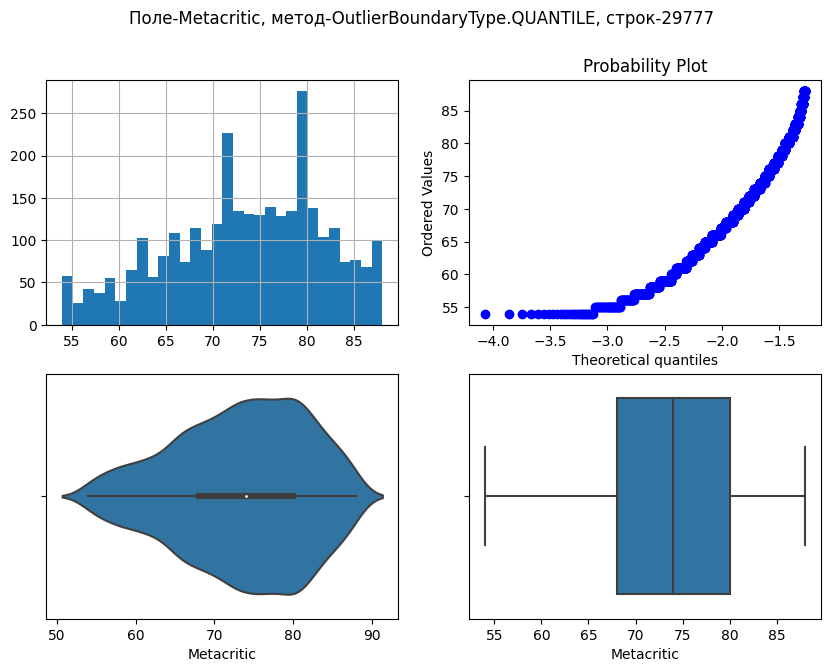

In [ ]:
for col in x_col_list:
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True,
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

## Дополнительное задание
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

Построим диаграмму рассеяния, демонстрирующую зависимость температуры от месяца года



In [ ]:
data = pd.read_csv('bike-hour.csv', sep=",")

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


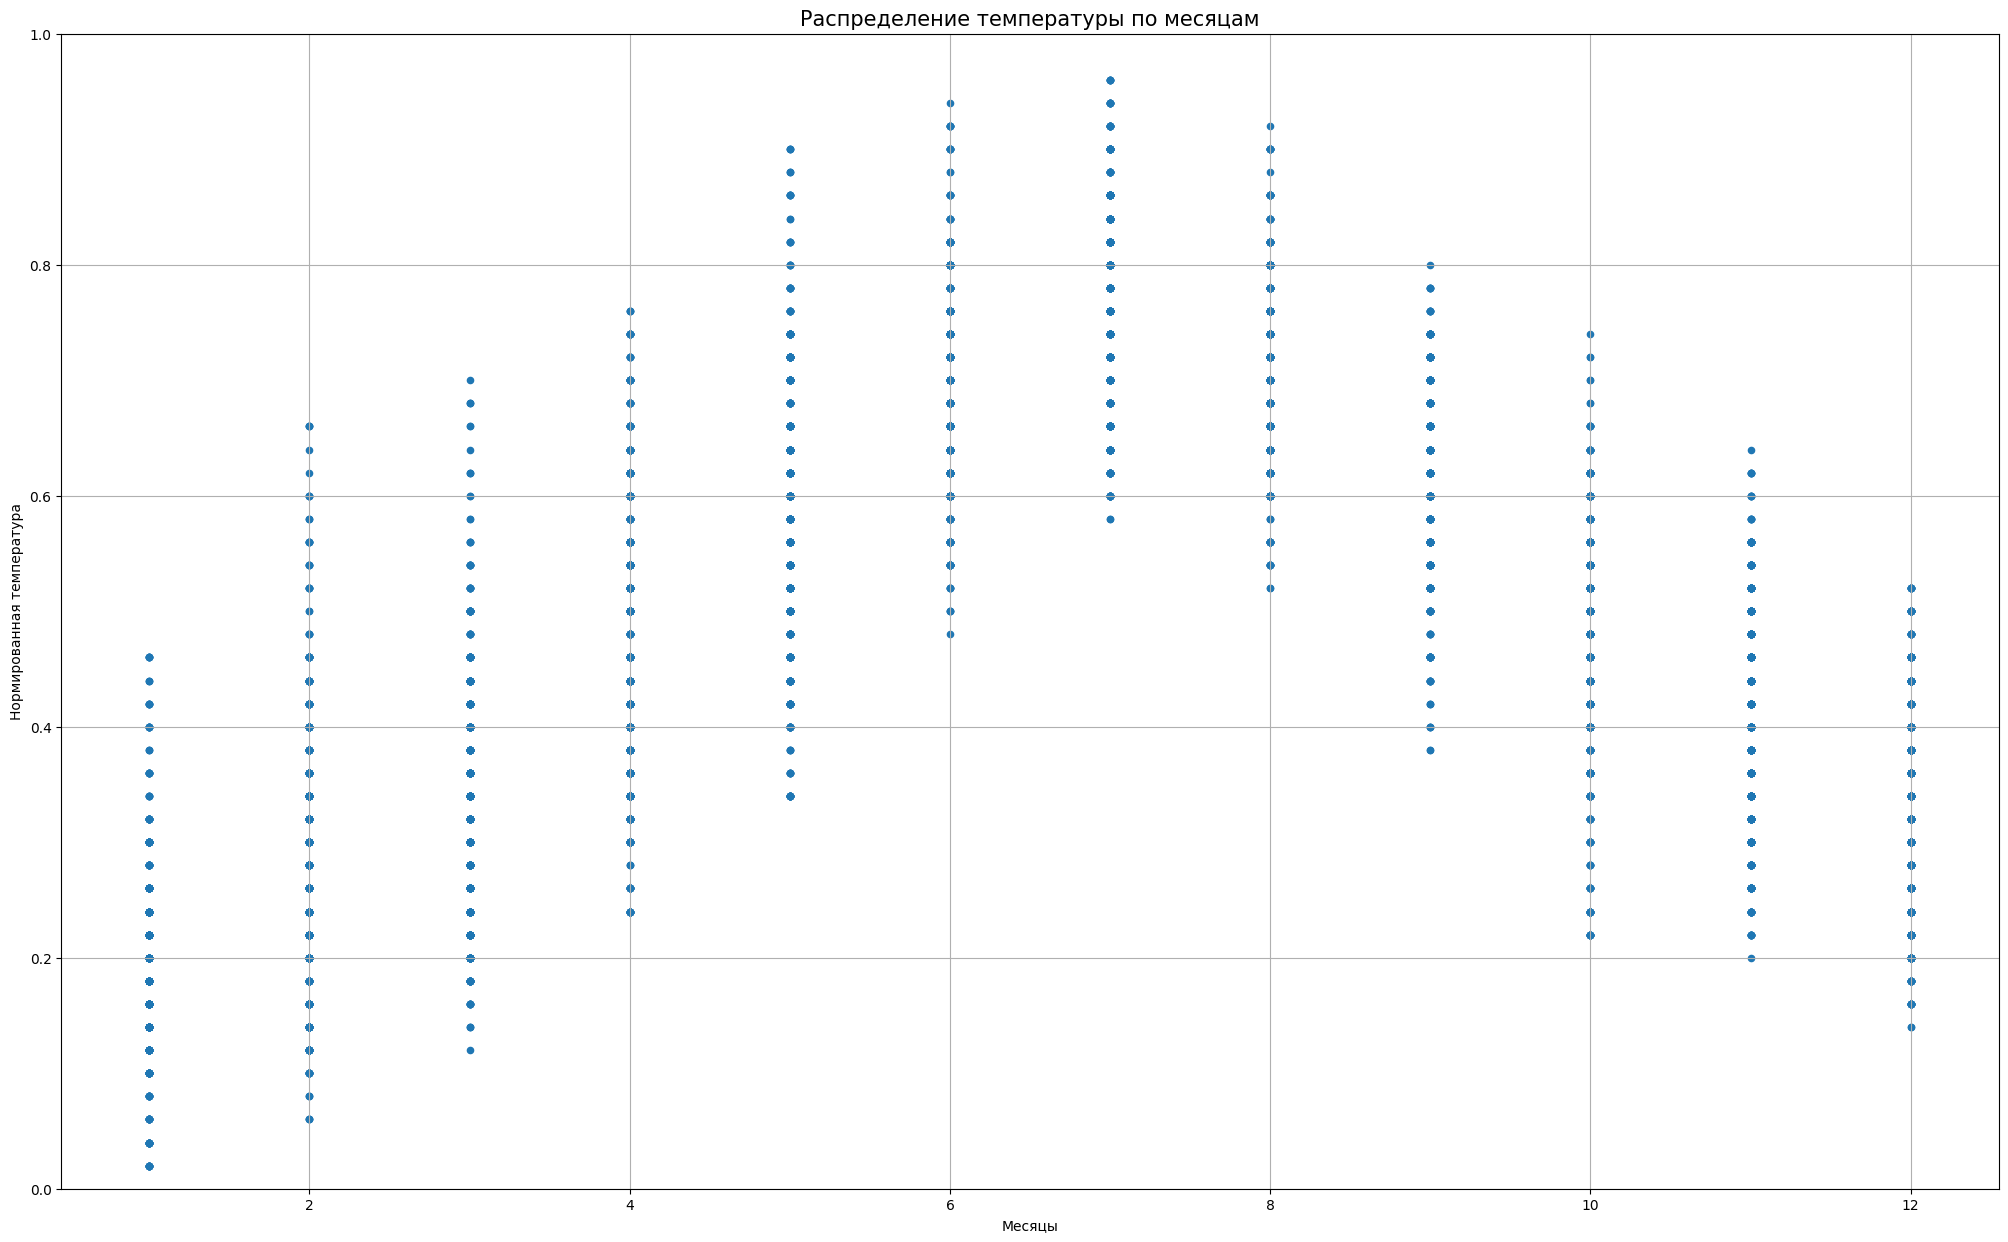

In [ ]:
data.plot(x='mnth', y='temp', kind='scatter',  figsize=(25, 15)) ;
plt.title(f'Распределение температуры по месяцам', fontsize=15);
plt.ylim(0,1);
plt.ylabel('Нормированная температура');
plt.xlabel('Месяцы');
plt.grid(True);
